In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('temps.csv')

In [3]:
print('The shape of our data is ', data.shape)

The shape of our data is  (348, 12)


In [4]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
#Visualisation
import datetime

#getting years, months and days
years= data.year
months= data.month
days= data.day

#list and then convert to datetime object
dates= [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip (years, months, days)]
dates=[datetime.datetime.strptime(date,"%Y-%m-%d") for date in dates]                                  

C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


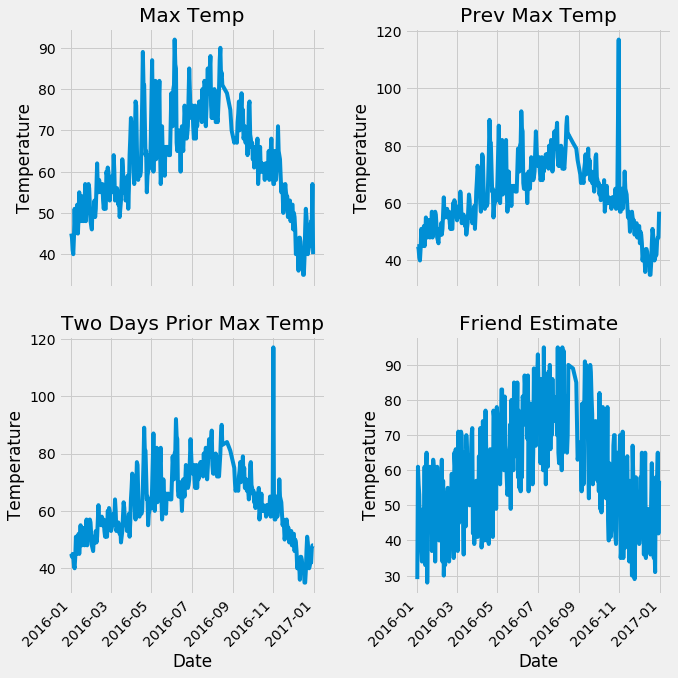

In [6]:
plt.style.use('fivethirtyeight')

#visualizing the data
#set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation = 45)

#Actual max temperature measurement
ax1.plot(dates, data['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature');
ax1.set_title('Max Temp')

#Temperature from 1 day ago
ax2.plot(dates, data['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature');
ax2.set_title('Prev Max Temp')

#Temperature from 2 days ago
ax3.plot(dates, data['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature');
ax3.set_title('Two Days Prior Max Temp')

#Friend Estimate
ax4.plot(dates, data['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature');
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [7]:
#just input the whole dataset into get_dummies instead of using OneHotEncoder
#this prolly convert categorical variables to numerical without arbituary order wch is what OneHot does
data= pd.get_dummies(data)

In [8]:
data.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [9]:
print('Shape of faetures after one-hot encoding: ', data.shape)

Shape of faetures after one-hot encoding:  (348, 18)


In [10]:
#FEATURES AND LABELS AND CONVERTED DATA TO ARRAYS
data.dtypes

year                int64
month               int64
day                 int64
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
week_Fri            uint8
week_Mon            uint8
week_Sat            uint8
week_Sun            uint8
week_Thurs          uint8
week_Tues           uint8
week_Wed            uint8
dtype: object

In [11]:
#set actual column to target
labels= np.array(data['actual'])

In [12]:
#drop actual column to set features
features= data.drop('actual', axis=1)

In [13]:
#convert column data to list and to array
features_list= list(data.columns)
features= np.array(features)

In [14]:
 len(data[data['month']>9])

91

In [15]:
train_all= data.copy()
train= train_all.loc[train_all.month <= 9]
valid= train_all.loc[train_all.month > 9]
print(train.shape, valid.shape)

(257, 18) (91, 18)


In [17]:
target_col = features_list.pop(6) #??what does pop do
in_cols = features_list

In [18]:
#Get our X and y training and validation sets ready
X_train, y_train= train[in_cols], train[target_col]
X_valid, y_valid= valid[in_cols], valid[target_col]

In [19]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_valid.shape)
print('Testing Labels Shape:', y_valid.shape)

Training Features Shape: (257, 17)
Training Labels Shape: (257,)
Testing Features Shape: (91, 17)
Testing Labels Shape: (91,)


In [31]:
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
train_features, test_features, train_labels, test_labels= train_test_split(features,
                                                                          labels,
                                                                          test_size= 0.2,
                                                                          random_state= 42)

In [32]:
#the baseline predictions are the historical averages
baseline_preds= test_features[:, features_list.index('average')]

#Baseline errors, and display average baseline error
baseline_errors= abs(baseline_preds - test_labels)

print('Average baseline error:', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error: 5.09 degrees.


In [45]:
#Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#Instantiate model
rf= RandomForestRegressor(bootstrap=True,ccp_alpha=0.0,min_samples_split=7, n_jobs=-1,n_estimators=2200,random_state=42)

#Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=2200, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [46]:
##Make Prediction
#Use forest predict method on the test data
predictions= rf.predict(X_valid)

#Calculate the absolute errors
errors= abs(predictions - y_valid)

#Print out the mean absolute error(mae)
print('Mean Absolute Error: ', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error:  3.53 degrees.


In [47]:
#Calculate mean absolute percentage error(MAPE)
mape= 100* (errors/y_valid)

#Calculate and display accuracy
accuracy= 100- np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

Accuracy: 92.97 %.
